In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [80]:
# all are integer and one float, and no categorical data

In [5]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [81]:
# max data equally distributed,few place skewed data, but carrying it as it is

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [82]:
# no null data, so no need to do null data management

<AxesSubplot:>

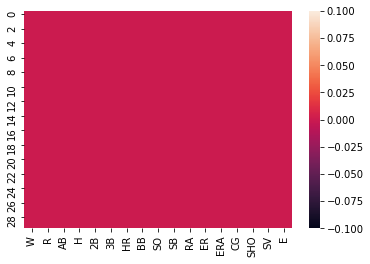

In [7]:
sn.heatmap(df.isnull())

In [8]:
cor=df.corr()

In [9]:
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

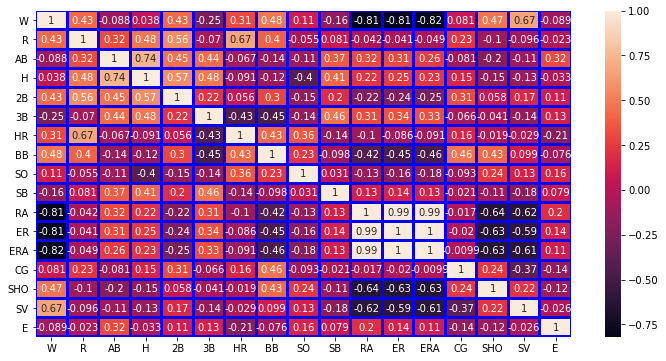

In [83]:
plt.figure(figsize=(12,6))
sn.heatmap(cor,annot=True,linewidth=2,linecolor='blue')

In [84]:
# from above plot,win has correlation with SV,BB,SHO,2B,R and HR chronologically

In [85]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# EDA

In [11]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

<AxesSubplot:xlabel='W', ylabel='count'>

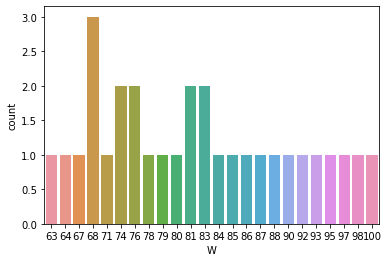

In [12]:
sn.countplot(df['W'])

<AxesSubplot:>

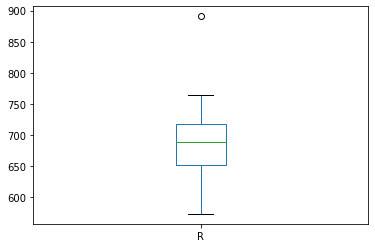

In [13]:
df['R'].plot.box()

<AxesSubplot:>

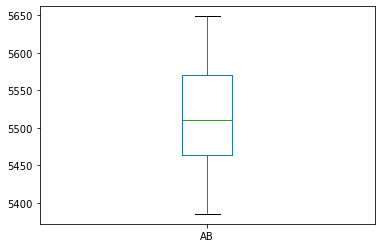

In [14]:
df['AB'].plot.box()

<AxesSubplot:>

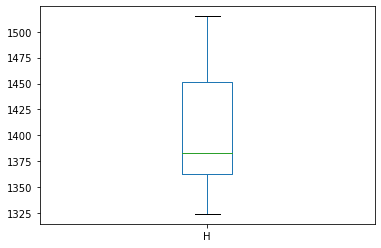

In [15]:
df['H'].plot.box()

<AxesSubplot:>

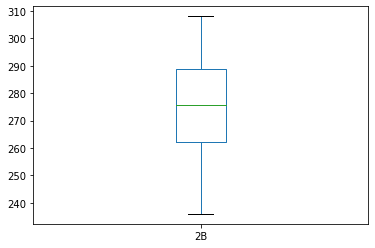

In [16]:
df['2B'].plot.box()

<AxesSubplot:>

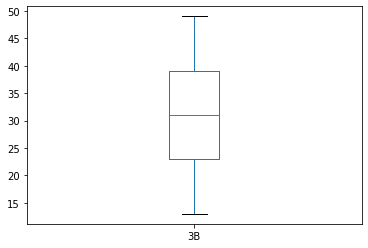

In [17]:
df['3B'].plot.box()

<AxesSubplot:>

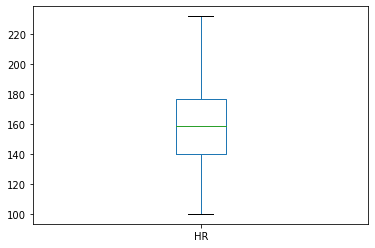

In [18]:
df['HR'].plot.box()

<AxesSubplot:>

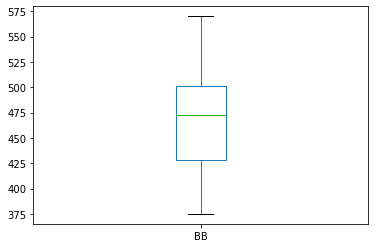

In [19]:
df['BB'].plot.box()

<AxesSubplot:>

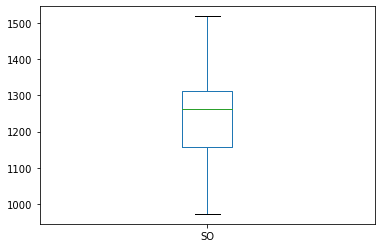

In [20]:
df['SO'].plot.box()

<AxesSubplot:>

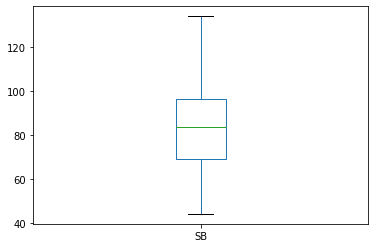

In [21]:
df['SB'].plot.box()

<AxesSubplot:>

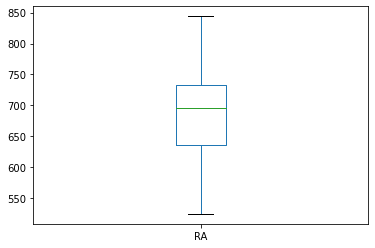

In [22]:
df['RA'].plot.box()

<AxesSubplot:>

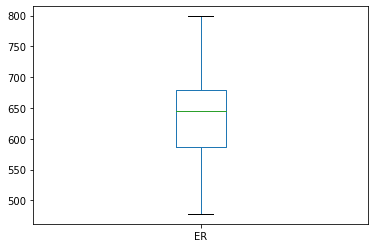

In [23]:
df['ER'].plot.box()

<AxesSubplot:>

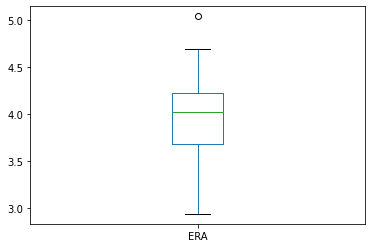

In [24]:
df['ERA'].plot.box()

<AxesSubplot:>

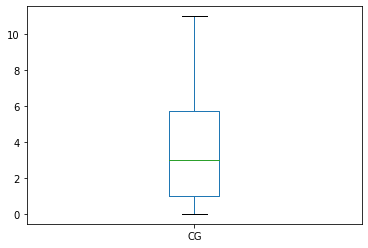

In [25]:
df['CG'].plot.box()

<AxesSubplot:>

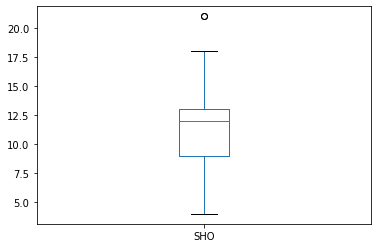

In [26]:
df['SHO'].plot.box()

<AxesSubplot:>

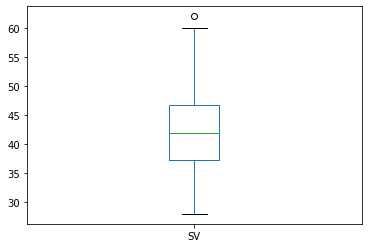

In [27]:
df['SV'].plot.box()

<AxesSubplot:>

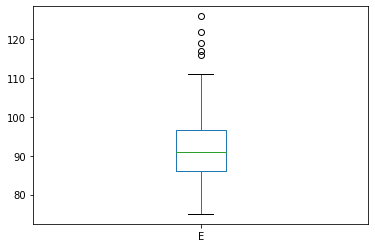

In [28]:
df['E'].plot.box()

In [29]:
collist=df.columns.values
ncol=12
nrows=10

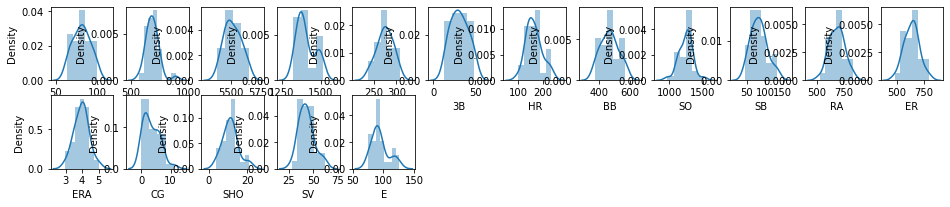

In [30]:
# snapshot of distribution curves of all input datas

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

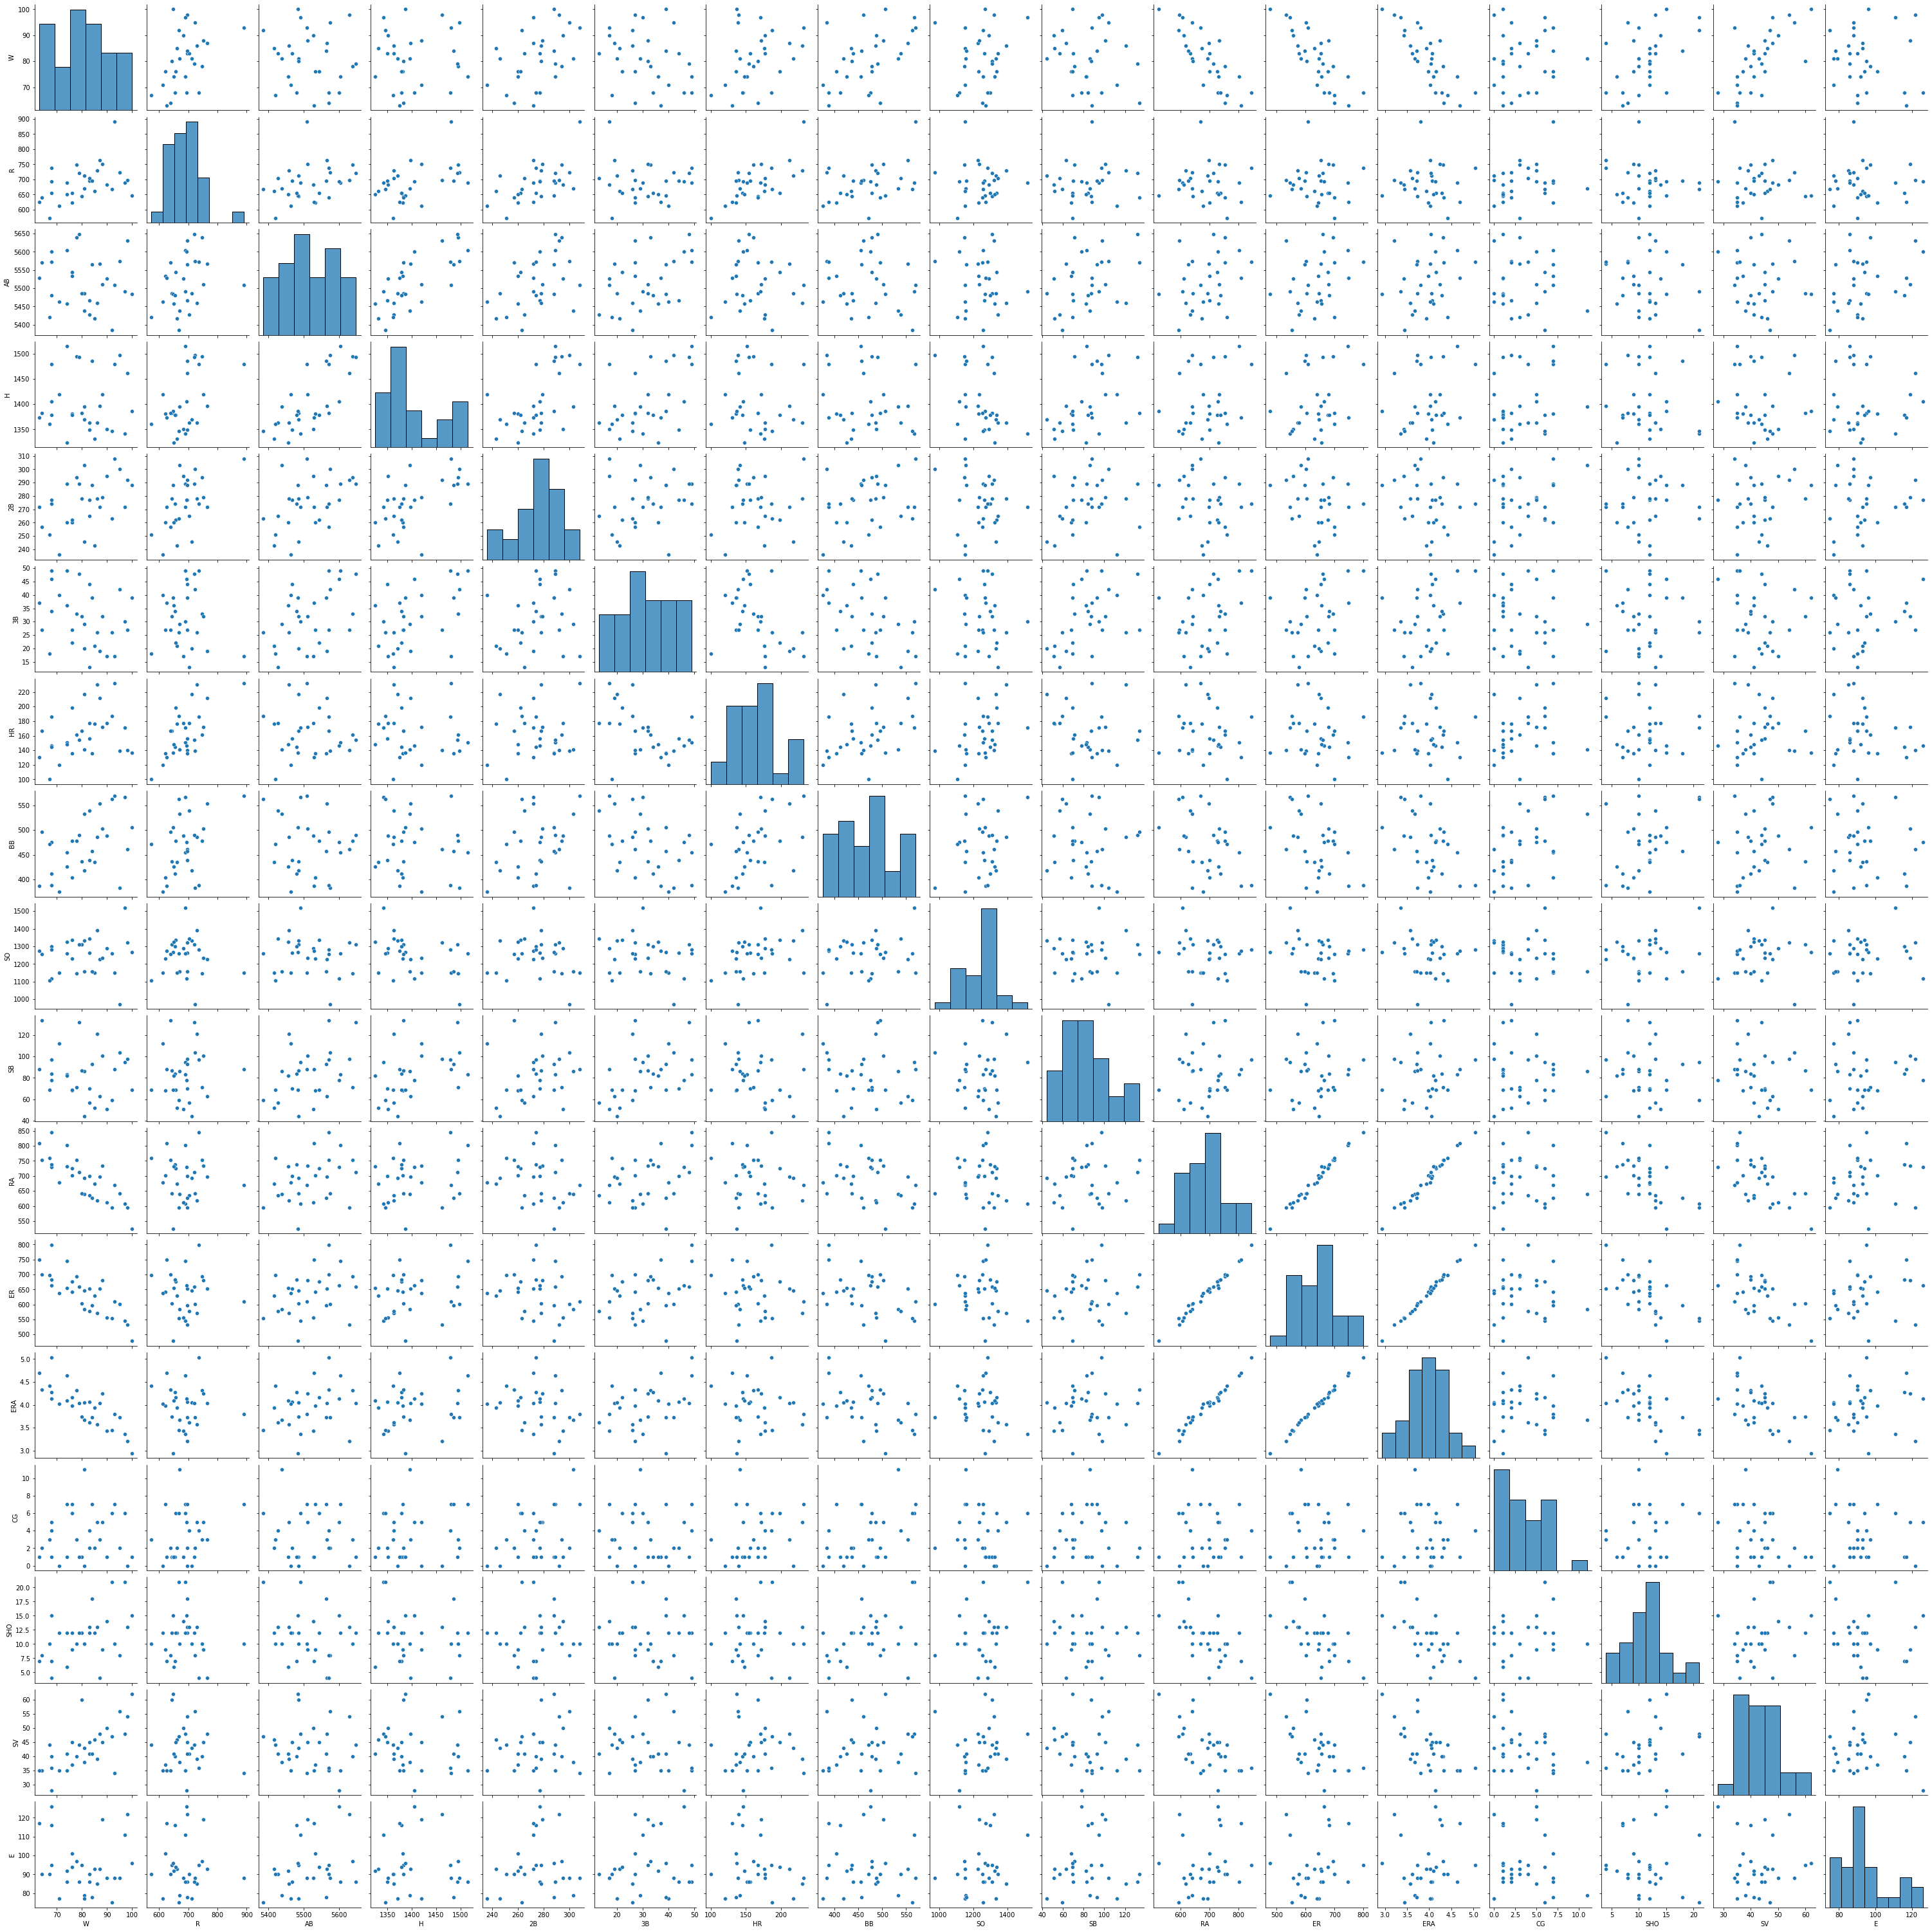

In [31]:
sn.pairplot(df)

<AxesSubplot:title={'center':'comparison between W and SV'}, xlabel='W', ylabel='SV'>

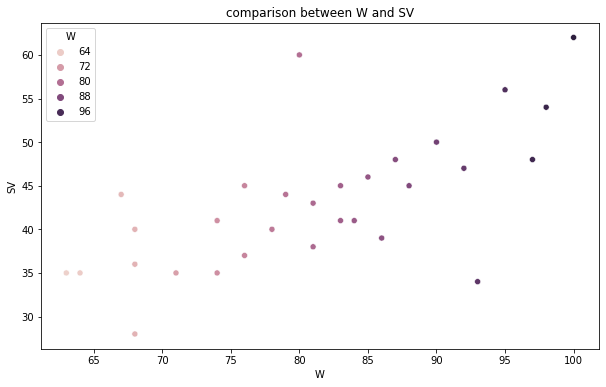

In [32]:
#Bivariate analysis,scatter plot based on corelation matrix

plt.figure(figsize=[10,6])
plt.title('comparison between W and SV')
sn.scatterplot(df['W'],df['SV'],hue=df['W'])

<AxesSubplot:title={'center':'comparison between W and BB'}, xlabel='W', ylabel='BB'>

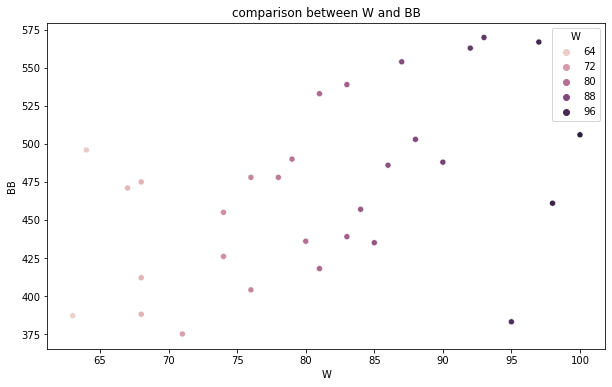

In [33]:
plt.figure(figsize=[10,6])
plt.title('comparison between W and BB')
sn.scatterplot(df['W'],df['BB'],hue=df['W'])

<AxesSubplot:title={'center':'comparison between W and HR'}, xlabel='W', ylabel='HR'>

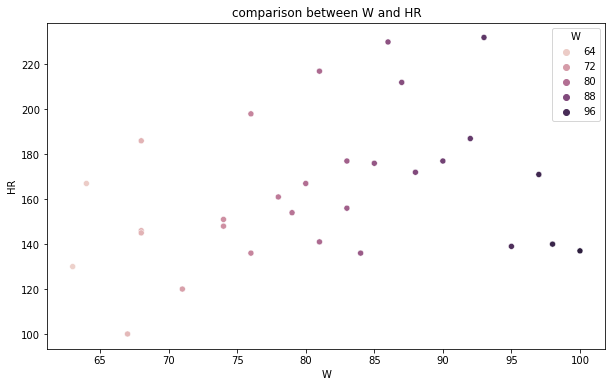

In [34]:
plt.figure(figsize=[10,6])
plt.title('comparison between W and HR')
sn.scatterplot(df['W'],df['HR'],hue=df['W'])

<AxesSubplot:title={'center':'comparison between W and 2B'}, xlabel='W', ylabel='2B'>

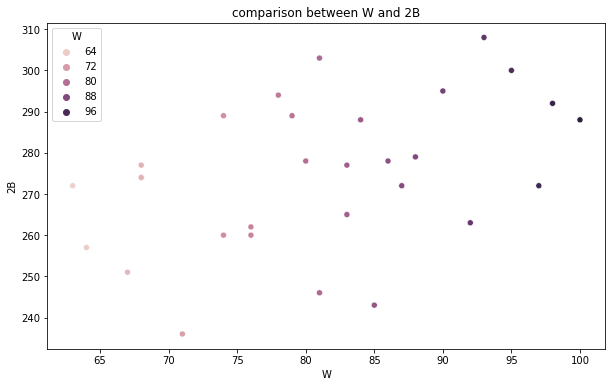

In [35]:
plt.figure(figsize=[10,6])
plt.title('comparison between W and 2B')
sn.scatterplot(df['W'],df['2B'],hue=df['W'])

<AxesSubplot:title={'center':'comparison between W and R'}, xlabel='W', ylabel='R'>

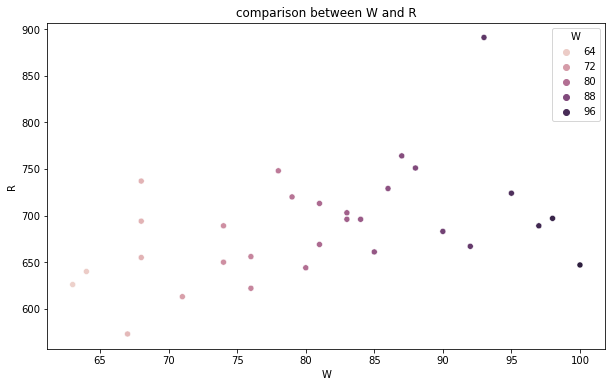

In [36]:
plt.figure(figsize=[10,6])
plt.title('comparison between W and R')
sn.scatterplot(df['W'],df['R'],hue=df['W'])

In [86]:
# Model Building

x=df.drop('W',axis=1)
y=df['W']

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [88]:
lm=LinearRegression()

In [89]:
lm.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [90]:
lm.coef_

array([ 1.25073846e-01, -1.23141914e-02, -3.00295435e-03, -5.81313447e-02,
       -6.20710968e-02, -3.95154506e-02, -7.43108825e-02, -3.42110204e-04,
        3.61324862e-02,  1.77209723e-01, -1.00050162e-01, -2.14311102e+01,
        1.08300717e+00,  8.09400283e-01,  8.94122278e-01, -7.56869614e-02])

In [91]:
lm.intercept_

105.9220894298556

In [92]:
lm.score(x_train,y_train)

0.9805421636702911

In [93]:
pred=lm.predict(x_test)
print("predicted W:",pred)
print("W",y_test)

predicted W: [98.63122006 75.69052022 89.01216771 83.49655694 59.84813009 98.32817063
 90.76204716 78.5081855  90.7967822 ]
W 15    100
28     74
26     84
10     88
24     63
0      95
8      80
6      87
25     92
Name: W, dtype: int64


In [94]:
print('error:')

print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 4.3902256586994985
mean squared error: 28.947283448689266
root mean squared error: 5.3802679718290305


In [95]:
from sklearn.metrics import r2_score

In [102]:
print(r2_score(y_test,pred_test))

0.8790507229532956


In [103]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.9609590618835543
At random state 0,the testing accuracy is:-0.6629341689506705


At random state 1,the training accuracy is:-0.9715846357165405
At random state 1,the testing accuracy is:-0.3841724690075786


At random state 2,the training accuracy is:-0.9898192153844548
At random state 2,the testing accuracy is:--2.081998955010787


At random state 3,the training accuracy is:-0.9722553885185528
At random state 3,the testing accuracy is:-0.4618378970602377


At random state 4,the training accuracy is:-0.964746149799658
At random state 4,the testing accuracy is:-0.4660685292728437


At random state 5,the training accuracy is:-0.9503092887369992
At random state 5,the testing accuracy is:-0.7517105066858546


At random state 6,the training accuracy is:-0.948947004521447
At random state 6,the testing accuracy is:-0.8376419521868339


At random state 7,the training accuracy is:-0.9631978535911326
At random state 7,the testing accuracy is:--0.2554

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)

In [109]:
lm.fit(x_train,y_train)

LinearRegression()

In [110]:
pred_test=lm.predict(x_test)

In [111]:
print(r2_score(y_test,pred_test))

0.8790507229532956


In [113]:
# R2 score for the model is 87%, let's build on more algorithms

In [114]:
from sklearn.linear_model import Lasso,Ridge

In [115]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9499167551243446

In [116]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9511147639153456

In [117]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9499926056810242


array([ 1.35508332e-01, -1.79552118e-02,  2.36852594e-03, -1.75850510e-01,
        1.06526876e-01, -6.18741052e-02, -6.97058458e-03, -9.83808842e-04,
        1.10530232e-02,  1.11705452e-01, -6.29454827e-02, -1.65987220e+01,
        9.56642922e-01,  2.80915363e-01,  8.14687525e-01, -3.19348154e-02])

In [118]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [119]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [120]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [121]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.6674452389575453
0.0027241597582827737
-0.0025309740792667235


In [ ]:
# from above ridge is 95% efficient, but may be due to overfitting 

In [122]:
#Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [123]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [124]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9072271814412398

In [125]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [126]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rdd=r2_score(y_test,pred_rd)
rdd

0.8243366544188429

In [127]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4379000482583654

In [128]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.0855937597495875

# Conclusion

In [133]:
# from analysis of accuracy scores and cross validation score it is decided that Lasso is right model with 90% efficiency

In [134]:
# Saving the model

import joblib
joblib.dump(lss,"Baseballwinprediction.pkl")

['Baseballwinprediction.pkl']